## Figure 2

Percent matching for Cell Painting and L1000

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(ggrepel))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "figure2")
extensions <- c(".png", ".pdf")

### Panel A - Percent matching within assay

In [3]:
results_dir <- file.path("../1.Data-exploration/Consensus/")

# To add analysis facet of all dose percent matching
updated_dose_order <- c(dose_order, "All")

In [4]:
pm_cellpainting_list <- load_percent_matching(assay = "cellpainting", results_dir = results_dir, append_all_dose = TRUE)
pm_l1000_list <- load_percent_matching(assay = "l1000", results_dir = results_dir, append_all_dose = TRUE)

print(dim(pm_cellpainting_list[["percent_matching"]]))
print(dim(pm_l1000_list[["percent_matching"]]))

print(dim(pm_cellpainting_list[["percent_matching_pvals"]]))
print(dim(pm_l1000_list[["percent_matching_pvals"]]))

[1] 1477    5
[1] 1477    5
[1] 1477    5
[1] 1477    5


In [5]:
p_val_alpha_thresh <- 0.05
plot_thresh <- -log10(p_val_alpha_thresh)

no_replicates_thresh <- 3

cell_painting_pm_df <- pm_cellpainting_list[["percent_matching"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)
l1000_pm_df <- pm_l1000_list[["percent_matching"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)

pm_df <- dplyr::bind_rows(cell_painting_pm_df, l1000_pm_df)

cell_painting_pm_pval_df <- pm_cellpainting_list[["percent_matching_pvals"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)
l1000_pm_pval_df <- pm_l1000_list[["percent_matching_pvals"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)

pm_pval_df <- dplyr::bind_rows(cell_painting_pm_pval_df, l1000_pm_pval_df)

pm_df <- pm_df %>%
    dplyr::left_join(pm_pval_df, by = c("moa", "dose", "assay", "no_of_replicates")) %>%
    dplyr::mutate(pass_thresh = p_value < p_val_alpha_thresh) %>%
    dplyr::mutate(neg_log_10_p_val = -log10(p_value))

pm_df$dose <- factor(pm_df$dose, levels = updated_dose_order)

pm_df$neg_log_10_p_val[pm_df$neg_log_10_p_val == Inf] = 3.5

# Output percent matching (MOA)
output_file <- file.path("results", "moa_scores.tsv")
readr::write_tsv(pm_df, output_file)

print(dim(pm_df))
head(pm_df)

[1] 1946    8


moa,no_of_replicates,dose,matching_score,assay,p_value,pass_thresh,neg_log_10_p_val
<chr>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>
acat inhibitor,3,0.04 uM,0.004444607,Cell Painting,0.513,FALSE,0.2898826
acetylcholine receptor agonist,8,0.04 uM,0.005142343,Cell Painting,0.576,FALSE,0.2395775
acetylcholine receptor antagonist,21,0.04 uM,0.019262183,Cell Painting,0.017,TRUE,1.7695511
adenosine receptor agonist,3,0.04 uM,0.009583710,Cell Painting,0.442,FALSE,0.3545777
adenosine receptor antagonist,4,0.04 uM,0.001703919,Cell Painting,0.612,FALSE,0.2132486
adrenergic receptor agonist,20,0.04 uM,0.005015938,Cell Painting,0.683,FALSE,0.1655793


In [6]:
table(pm_df$no_of_replicates, pm_df$assay)

     
      Cell Painting L1000
  3             258   258
  4             162   162
  5              84    84
  6              64    60
  7              60    60
  8              24    24
  9              12    12
  11             12    12
  12             95    96
  13             12    12
  14             12    12
  15             12    12
  18             41    43
  19              6     6
  20              6     6
  21              6     6
  24             35    33
  27              6     6
  28              6     6
  30             16    14
  31              6     6
  36              7    10
  42              8    10
  48              4     4
  54              2     2
  60              1     0
  66              1     2
  72              3     2
  78              1     2
  84              2     2
  90              2     2
  108             1     0
  114             0     1
  120             2     1
  126             0     1
  138             1     0
  144             0     1
  150 

In [7]:
percent_matching_df <- pm_df %>%
    dplyr::group_by(assay, dose) %>%
    dplyr::mutate(percent_matching = paste0(100 * round((sum(pass_thresh) / length(pass_thresh)), 2), "%")) %>%
    dplyr::select(dose, assay, percent_matching) %>%
    dplyr::distinct()

percent_matching_df

dose,assay,percent_matching
<fct>,<chr>,<chr>
0.04 uM,Cell Painting,16%
0.12 uM,Cell Painting,17%
0.37 uM,Cell Painting,20%
1.11 uM,Cell Painting,23%
3.33 uM,Cell Painting,28%
10 uM,Cell Painting,28%
All,Cell Painting,44%
0.04 uM,L1000,7%
0.12 uM,L1000,10%


In [8]:
# How many compounds per assay per dose with greater than 3 compounds?
for (dose in unique(pm_df$dose)) {
    pm_sub_df <- pm_df %>% dplyr::filter(dose == !!dose)
    print(table(pm_sub_df %>% dplyr::pull(assay)))
}


Cell Painting         L1000 
          127           127 

Cell Painting         L1000 
          127           127 

Cell Painting         L1000 
          127           127 

Cell Painting         L1000 
          127           127 

Cell Painting         L1000 
          127           127 

Cell Painting         L1000 
          127           127 

Cell Painting         L1000 
          211           211 


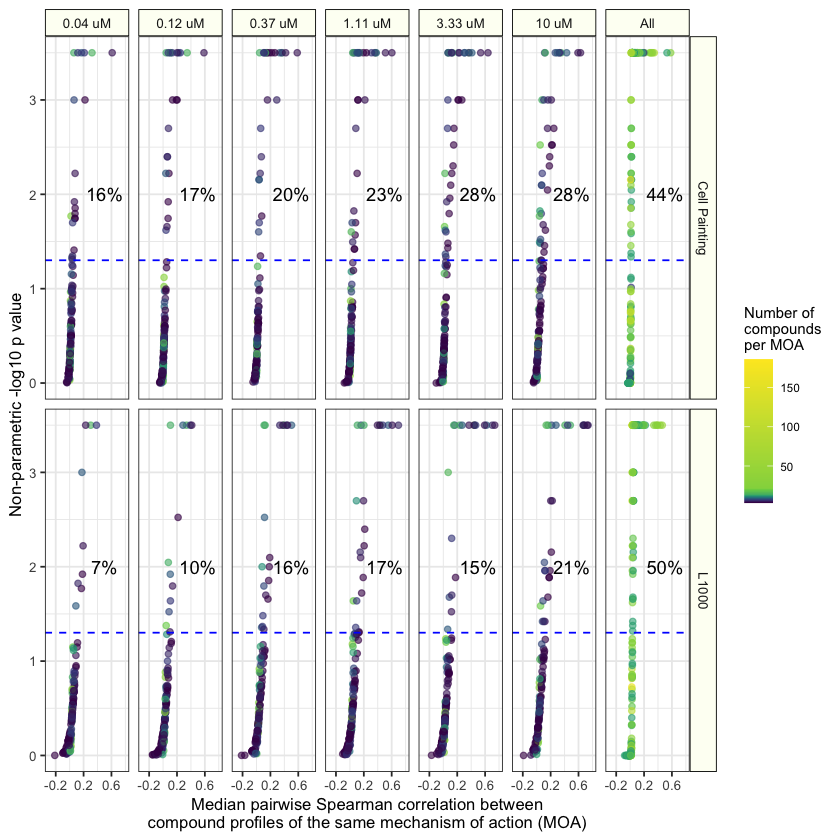

In [9]:
panel_a_gg <- (
    ggplot(pm_df, aes(x = matching_score, y = neg_log_10_p_val))
    + geom_point(aes(color = no_of_replicates), alpha = 0.6)
    + geom_text(data = percent_matching_df, aes(label = percent_matching, x = 0.5, y = 2))
    + facet_grid("assay~dose")
    + geom_hline(linetype = "dashed", color = "blue", yintercept = plot_thresh)
    + theme_bw()
    + figure_theme
    + scale_color_continuous("Number of\ncompounds\nper MOA", values = scales::rescale(c(0, 2, 4, 6, 8, 15, 150)), type = "viridis")
    + xlab("Median pairwise Spearman correlation between\ncompound profiles of the same mechanism of action (MOA)")
    + ylab("Non-parametric -log10 p value")
    + scale_x_continuous(breaks = seq(-0.2, 0.8, 0.4), limits = c(-0.3, 0.8))
)

panel_a_gg

## Panel B - MOA median correlation comparison between assays

In [10]:
results_dir <- file.path("../1.Data-exploration/Consensus/")

pm_cellpainting_list <- load_percent_matching(assay = "cellpainting", results_dir = results_dir, append_all_dose = TRUE)
pm_l1000_list <- load_percent_matching(assay = "l1000", results_dir = results_dir, append_all_dose = TRUE)

cell_painting_pm_df <- pm_cellpainting_list[["percent_matching"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)
l1000_pm_df <- pm_l1000_list[["percent_matching"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)

pm_df <- dplyr::bind_rows(cell_painting_pm_df, l1000_pm_df)

cell_painting_pm_pval_df <- pm_cellpainting_list[["percent_matching_pvals"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)
l1000_pm_pval_df <- pm_l1000_list[["percent_matching_pvals"]] %>%
    dplyr::filter(no_of_replicates >= no_replicates_thresh)

pm_pval_df <- dplyr::bind_rows(cell_painting_pm_pval_df, l1000_pm_pval_df)

pm_df <- pm_df %>%
    dplyr::left_join(pm_pval_df, by = c("moa", "dose", "assay", "no_of_replicates")) %>%
    dplyr::mutate(pass_thresh = p_value < p_val_alpha_thresh) %>%
    dplyr::mutate(neg_log_10_p_val = -log10(p_value))

pm_df$dose <- factor(pm_df$dose, levels = updated_dose_order)

pm_df$neg_log_10_p_val[pm_df$neg_log_10_p_val == Inf] = 3.5

print(dim(pm_df))
head(pm_df)

[1] 1946    8


moa,no_of_replicates,dose,matching_score,assay,p_value,pass_thresh,neg_log_10_p_val
<chr>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>
acat inhibitor,3,0.04 uM,0.004444607,Cell Painting,0.513,FALSE,0.2898826
acetylcholine receptor agonist,8,0.04 uM,0.005142343,Cell Painting,0.576,FALSE,0.2395775
acetylcholine receptor antagonist,21,0.04 uM,0.019262183,Cell Painting,0.017,TRUE,1.7695511
adenosine receptor agonist,3,0.04 uM,0.009583710,Cell Painting,0.442,FALSE,0.3545777
adenosine receptor antagonist,4,0.04 uM,0.001703919,Cell Painting,0.612,FALSE,0.2132486
adrenergic receptor agonist,20,0.04 uM,0.005015938,Cell Painting,0.683,FALSE,0.1655793


In [11]:
# Prep additional data for plotting
replicate_counts_df <- pm_df %>%
    tidyr::drop_na() %>%
    dplyr::group_by(moa, dose) %>%
    dplyr::mutate(avg_replicate_count = mean(no_of_replicates)) %>%
    dplyr::select(moa, dose, avg_replicate_count) %>%
    dplyr::ungroup() %>%
    dplyr::distinct()

cp_pass_thresh <- pm_df %>%
    dplyr::filter(assay == "Cell Painting", pass_thresh) %>%
    dplyr::select(moa, dose, pass_thresh) %>%
    dplyr::rename(pass_thresh_cellpainting = pass_thresh)

l1000_pass_thresh <- pm_df %>%
    dplyr::filter(assay == "L1000", pass_thresh) %>%
    dplyr::select(moa, dose, pass_thresh) %>%
    dplyr::rename(pass_thresh_l1000 = pass_thresh)

pass_thresh_both <- cp_pass_thresh %>%
    dplyr::full_join(l1000_pass_thresh, by = c("moa", "dose")) %>%
    tidyr::replace_na(list(pass_thresh_cellpainting = FALSE, pass_thresh_l1000 = FALSE)) %>%
    dplyr::mutate(pass_both = pass_thresh_cellpainting + pass_thresh_l1000) %>%
    dplyr::mutate(pass_both = ifelse(pass_both == 2, TRUE, FALSE)) %>%
    dplyr::mutate(moa_color_passing = 0)

pass_thresh_both$moa_color_passing[pass_thresh_both$pass_both] <- "#DF74F0"
pass_thresh_both$moa_color_passing[(pass_thresh_both$pass_thresh_cellpainting & !pass_thresh_both$pass_both)] <- paste(assay_colors["Cell Painting"])
pass_thresh_both$moa_color_passing[(pass_thresh_both$pass_thresh_l1000 & !pass_thresh_both$pass_both)] <- assay_colors["L1000"]

head(pass_thresh_both)

moa,dose,pass_thresh_cellpainting,pass_thresh_l1000,pass_both,moa_color_passing
<chr>,<fct>,<lgl>,<lgl>,<lgl>,<chr>
acetylcholine receptor antagonist,0.04 uM,TRUE,FALSE,FALSE,#F0C178
androgen receptor agonist,0.04 uM,TRUE,FALSE,FALSE,#F0C178
aromatase inhibitor,0.04 uM,TRUE,FALSE,FALSE,#F0C178
benzodiazepine receptor agonist,0.04 uM,TRUE,FALSE,FALSE,#F0C178
cdk inhibitor,0.04 uM,TRUE,FALSE,FALSE,#F0C178
dipeptidyl peptidase inhibitor,0.04 uM,TRUE,FALSE,FALSE,#F0C178


In [12]:
plot_ready_pm_df <- pm_df %>%
    reshape2::dcast(moa + dose ~ assay, value.var = "matching_score") %>%
    tidyr::drop_na() %>%
    dplyr::left_join(replicate_counts_df, by = c("moa", "dose")) %>%
    dplyr::left_join(pass_thresh_both, by = c("moa", "dose")) %>%
    tidyr::replace_na(
        list(
            pass_thresh_cellpainting = FALSE,
            pass_thresh_l1000 = FALSE,
            pass_both = FALSE,
            moa_color_passing = "lightgrey"
        )
    )

# Output file for further use
output_pm_file <- file.path("data", "significant_moas_by_threshold_both_assays.tsv.gz")
plot_ready_pm_df %>% readr::write_tsv(output_pm_file)

head(plot_ready_pm_df)

,moa,dose,Cell Painting,L1000,avg_replicate_count,pass_thresh_cellpainting,pass_thresh_l1000,pass_both,moa_color_passing
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>
1,5 alpha reductase inhibitor,All,-0.018411522,0.084630290,12,FALSE,TRUE,FALSE,#8AA7F0
2,acat inhibitor,0.04 uM,0.004444607,-0.068682491,3,FALSE,FALSE,FALSE,lightgrey
3,acat inhibitor,0.12 uM,0.023240710,-0.124012771,3,FALSE,FALSE,FALSE,lightgrey
4,acat inhibitor,0.37 uM,-0.017092617,0.004646673,3,FALSE,FALSE,FALSE,lightgrey
5,acat inhibitor,1.11 uM,-0.080471943,-0.027784508,3,FALSE,FALSE,FALSE,lightgrey
6,acat inhibitor,3.33 uM,-0.101490045,-0.072057893,3,FALSE,FALSE,FALSE,lightgrey


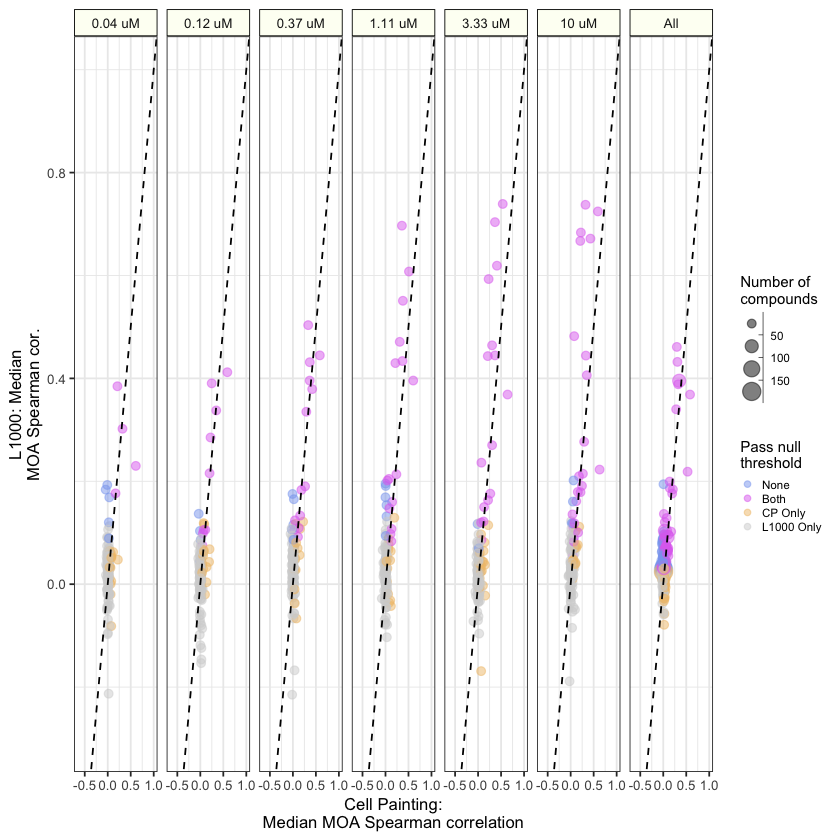

In [13]:
passing_colors <- unique(plot_ready_pm_df$moa_color_passing)
names(passing_colors) <- unique(plot_ready_pm_df$moa_color_passing)

passing_labels <- c("None", "L1000 Only", "CP Only", "Both")
names(passing_labels) <- unique(plot_ready_pm_df$moa_color_passing)

panel_b_gg <- (
    ggplot(plot_ready_pm_df, aes(x = `Cell Painting`, y = L1000))
    + geom_point(aes(size = avg_replicate_count, color = moa_color_passing), alpha = 0.5)
    + facet_grid("~dose")
    + figure_theme
    + scale_color_manual(
        "Pass null\nthreshold",
        values = passing_colors,
        labels = passing_labels
    )
    + scale_size_binned("Number of\ncompounds", range = c(0.5, 5))
    + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black")
    + xlim(c(-0.65, 1))
    + ylim(c(-0.3, 1))
    + xlab("Cell Painting:\nMedian MOA Spearman correlation")
    + ylab("L1000: Median\nMOA Spearman cor.")
    + theme(legend.key.size = unit(0.3, 'cm'))
)

panel_b_gg

## Panel C - MOA percent matching summary

In [14]:
summary_df <- pm_df %>%
    dplyr::select(moa, dose, assay, p_value) %>%
    reshape2::dcast(moa + dose ~ assay, value.var = "p_value") %>%
    dplyr::rename(
        "Cell_Painting_p_value" = `Cell Painting`,
        "L1000_p_value" = `L1000`
    ) %>%
    dplyr::left_join(
        pm_df %>%
        dplyr::select(moa, dose, assay, matching_score) %>%
        reshape2::dcast(moa + dose ~ assay, value.var = "matching_score") %>%
        dplyr::rename(
            "Cell_Painting_matching_score" = `Cell Painting`,
            "L1000_matching_score" = `L1000`
        ),
        by = c("moa", "dose")
    ) %>%
    dplyr::mutate(
        pass_cellpainting_thresh = Cell_Painting_p_value < p_val_alpha_thresh,
        pass_l1000_thresh = L1000_p_value < p_val_alpha_thresh
    ) %>%
    dplyr::mutate(pass_both = pass_cellpainting_thresh + pass_l1000_thresh) %>%
    dplyr::mutate(pass_both = ifelse(pass_both == 2, TRUE, FALSE))

head(summary_df, 3)

,moa,dose,Cell_Painting_p_value,L1000_p_value,Cell_Painting_matching_score,L1000_matching_score,pass_cellpainting_thresh,pass_l1000_thresh,pass_both
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,5 alpha reductase inhibitor,All,1.000,0.000,-0.018411522,0.08463029,FALSE,TRUE,FALSE
2,acat inhibitor,0.04 uM,0.513,0.900,0.004444607,-0.06868249,FALSE,FALSE,FALSE
3,acat inhibitor,0.12 uM,0.247,0.972,0.023240710,-0.12401277,FALSE,FALSE,FALSE


In [15]:
summary_df %>%
    dplyr::group_by(dose) %>%
    dplyr::mutate(
        num_pass_cellpainting = sum(pass_cellpainting_thresh),
        num_pass_l1000 = sum(pass_l1000_thresh),
        num_pass_both = sum(pass_both)
    ) %>%
    dplyr::ungroup() %>%
    dplyr::select(dose, num_pass_cellpainting, num_pass_l1000, num_pass_both) %>%
    dplyr::distinct() %>%
    dplyr::mutate(
        unique_pass_cellpainting = num_pass_cellpainting - num_pass_both,
        unique_pass_l1000 = num_pass_l1000 - num_pass_both
    ) %>%
    dplyr::arrange(dose)

dose,num_pass_cellpainting,num_pass_l1000,num_pass_both,unique_pass_cellpainting,unique_pass_l1000
<fct>,<int>,<int>,<int>,<int>,<int>
0.04 uM,20,9,4,16,5
0.12 uM,22,13,9,13,4
0.37 uM,25,20,13,12,7
1.11 uM,29,22,15,14,7
3.33 uM,36,19,16,20,3
10 uM,35,27,23,12,4
All,93,106,50,43,56


In [16]:
pass_thresh_summary_moa_df <- summary_df %>%
    dplyr::group_by(dose) %>%
    dplyr::mutate(
        num_pass_cellpainting = sum(pass_cellpainting_thresh),
        num_pass_l1000 = sum(pass_l1000_thresh),
        num_pass_both = sum(pass_both)
    ) %>%
    dplyr::ungroup() %>%
    dplyr::select(dose, num_pass_cellpainting, num_pass_l1000, num_pass_both) %>%
    dplyr::distinct() %>%
    dplyr::mutate(
        unique_pass_cellpainting = num_pass_cellpainting - num_pass_both,
        unique_pass_l1000 = num_pass_l1000 - num_pass_both
    ) %>%
    dplyr::arrange(dose)

cell_painting_moa_rect <- pass_thresh_summary_moa_df %>%
    dplyr::select(dose, num_pass_cellpainting, unique_pass_cellpainting, num_pass_both) %>%
    dplyr::rename(c(ymax_bar = num_pass_cellpainting, unique_pass = unique_pass_cellpainting)) %>%
    dplyr::mutate(
        ymin_bar = 0,
        xmin_bar = seq(0, (length(unique(pass_thresh_summary_moa_df$dose)) - 1) * 2, 2),
        xmax_bar = seq(1, (length(unique(pass_thresh_summary_moa_df$dose))) * 2, 2),
        assay = "Cell Painting",
        label_text_y = 2,
        updated_ymin_bar = ymin_bar,
        updated_ymax_bar = ymax_bar - num_pass_both
    )

l1000_moa_rect <- pass_thresh_summary_moa_df %>%
    dplyr::mutate(ymax_bar = num_pass_cellpainting + unique_pass_l1000) %>%
    dplyr::select(dose, ymax_bar, unique_pass_cellpainting, unique_pass_l1000, num_pass_both) %>%
    dplyr::rename(c(ymin_bar = unique_pass_cellpainting, unique_pass = unique_pass_l1000)) %>%
    dplyr::mutate(
        xmin_bar = seq(0, (length(unique(pass_thresh_summary_moa_df$dose)) - 1) * 2, 2),
        xmax_bar = seq(1, (length(unique(pass_thresh_summary_moa_df$dose))) * 2, 2),
        assay = "L1000",
        label_text_y = ymax_bar - 1.5,
        updated_ymin_bar = ymin_bar + num_pass_both,
        updated_ymax_bar = ymax_bar
    )

both_moa_rect <- cell_painting_moa_rect %>%
    dplyr::select(dose, xmin_bar, xmax_bar, updated_ymin_bar, updated_ymax_bar) %>%
    dplyr::left_join(
        l1000_moa_rect %>%
        dplyr::select(dose, xmin_bar, xmax_bar, updated_ymin_bar, updated_ymax_bar),
        by = c("dose", "xmin_bar", "xmax_bar"),
        suffix = c("_cp", "_l1000")
    ) %>%
    dplyr::mutate(
        updated_ymin_bar = updated_ymax_bar_cp,
        updated_ymax_bar = updated_ymin_bar_l1000,
        assay = "Both"
    ) %>%
    dplyr::select(dose, xmin_bar, xmax_bar, assay, updated_ymin_bar, updated_ymax_bar)

full_moa_rect <- dplyr::bind_rows(cell_painting_moa_rect, l1000_moa_rect, both_moa_rect)

num_pass_both_moa_text <- full_moa_rect %>%
    dplyr::filter(assay == "Cell Painting") %>%
    dplyr::select(dose, xmin_bar, ymax_bar, num_pass_both) %>%
    dplyr::left_join(
        full_moa_rect %>%
            dplyr::filter(assay == "L1000") %>%
            dplyr::select(dose, ymin_bar) %>%
            dplyr::rename(c(ymin_l1000_bar = ymin_bar)),
        by = "dose"
    ) %>%
    dplyr::mutate(label_text_y = ymin_l1000_bar + num_pass_both / 2)

In [17]:
total_moas <- length(unique(summary_df$moa))
total_moas

[1] 211

In [18]:
moa_count_summary_per_dose <- summary_df %>%
    dplyr::group_by(dose) %>%
    dplyr::mutate(total_moa_count = length(unique(moa))) %>%
    dplyr::select(dose, total_moa_count) %>%
    dplyr::distinct()

moa_count_summary_per_dose

dose,total_moa_count
<fct>,<int>
All,211
0.04 uM,127
0.12 uM,127
0.37 uM,127
1.11 uM,127
3.33 uM,127
10 uM,127


In [19]:
percentile_pass_moa_df <- pass_thresh_summary_moa_df %>%
    dplyr::left_join(moa_count_summary_per_dose, by = "dose") %>%
    dplyr::mutate(
        num_pass_total = unique_pass_l1000 + unique_pass_cellpainting + num_pass_both,
        num_pass_percentile = paste("Total:\n", round(num_pass_total / total_moa_count, 2) * 100, "%")
    ) %>%
    dplyr::select(dose, num_pass_total, num_pass_percentile)

percentile_pass_moa_df

dose,num_pass_total,num_pass_percentile
<fct>,<int>,<chr>
0.04 uM,25,Total: 20 %
0.12 uM,26,Total: 20 %
0.37 uM,32,Total: 25 %
1.11 uM,36,Total: 28 %
3.33 uM,39,Total: 31 %
10 uM,39,Total: 31 %
All,149,Total: 71 %


In [20]:
# Prep legend order
full_moa_rect <- full_moa_rect %>%
    dplyr::left_join(percentile_pass_moa_df, by = "dose")

full_moa_rect$assay <- factor(full_moa_rect$assay, levels = c("L1000", "Both", "Cell Painting"))
full_moa_rect$dose <- factor(full_moa_rect$dose, levels = updated_dose_order)
num_pass_both_moa_text$dose <- factor(num_pass_both_moa_text$dose, levels = updated_dose_order)

Warning message:
“Removed 7 rows containing missing values (geom_text).”


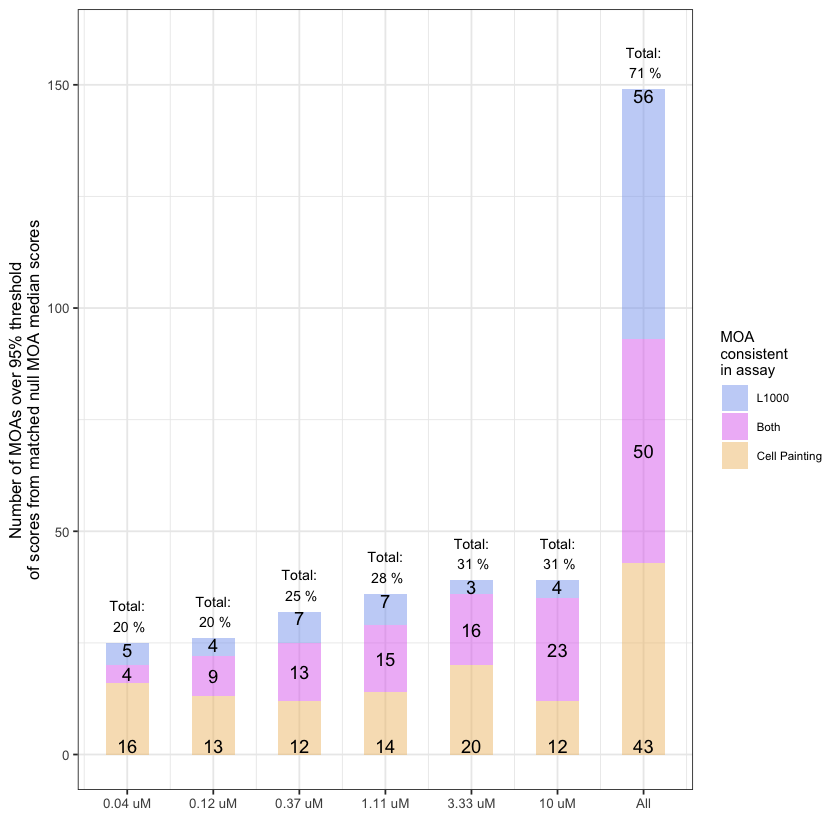

In [21]:
updated_assay_colors <- c(assay_colors, "Both" = "#DF74F0") 

panel_c_gg <- (
    ggplot(full_moa_rect)
    + geom_rect(
        aes(
            fill = assay,
            ymin = updated_ymin_bar,
            ymax = updated_ymax_bar,
            xmin = xmin_bar,
            xmax = xmax_bar
        ),
        alpha = 0.5
    )
    + geom_text(
        aes(
            x = xmin_bar + 0.5,
            y = label_text_y,
            label = unique_pass
        )
    )
    + geom_text(
        data = num_pass_both_moa_text,
        aes(
            x = xmin_bar + 0.5,
            y = label_text_y,
            label = num_pass_both
        )
    )
    # Select only L1000 below to not duplicate text
    + geom_text(
        data = full_moa_rect %>% dplyr::filter(assay == "L1000"),
        aes(
            x = xmin_bar + 0.5,
            y = ymax_bar + 6,
            label = num_pass_percentile
        ),
        size = 3
    )
    + scale_fill_manual("MOA\nconsistent\nin assay", values = updated_assay_colors)
    + theme_bw()
    + figure_theme
    + scale_x_continuous(
        labels = num_pass_both_moa_text$dose,
        breaks = seq(0.5, length(num_pass_both_moa_text$dose) * 2, 2),
    )
    + ylab("Number of MOAs over 95% threshold\nof scores from matched null MOA median scores")
    + xlab("")
    + ylim(0, max(full_moa_rect$num_pass_total, na.rm = TRUE) + 10)
)

panel_c_gg

## Panel D - MOA/Target Precision

In [22]:
# Load precision scores
precision_file <- file.path("..", "1.Data-exploration", "results", "moa_target_precision.tsv.gz")

precision_cols <- readr::cols(
  drug_impact = readr::col_character(),
  dose = readr::col_character(),
  avg_precision = readr::col_double(),
  impact_category = readr::col_character(),
  assay = readr::col_character()
)

# Load and process data for plotting
precision_df <- readr::read_tsv(precision_file, col_types = precision_cols) %>%
    reshape2::dcast(drug_impact+dose+impact_category+dose_comparison~assay, value.var = "avg_precision") %>%
    dplyr::arrange(desc(L1000))

# Separate the dose comparison and recode dose separately
same_dose_precision_df <- precision_df %>%
    dplyr::filter(dose_comparison == "same_dose")

same_dose_precision_df$dose <- as.numeric(paste(same_dose_precision_df$dose))
same_dose_precision_df$dose <- dplyr::recode_factor(same_dose_precision_df$dose, !!!dose_rename)

precision_df <- dplyr::bind_rows(
    same_dose_precision_df,
    precision_df %>%
        dplyr::filter(dose_comparison != "same_dose")
    ) %>%
    tidyr::drop_na()

precision_df$dose <- factor(precision_df$dose, levels = updated_dose_order)

impact_recode <- c("moa" = "Compound mechanism of action (MOA)", "target" = "Gene target")
precision_df$impact_category <- dplyr::recode_factor(precision_df$impact_category, !!!impact_recode)
precision_df$impact_category <- factor(precision_df$impact_category, levels = impact_recode)

print(dim(precision_df))
head(precision_df, 5)

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”
Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”


[1] 5005    6


,drug_impact,dose,impact_category,dose_comparison,cell_painting,L1000
,<chr>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,HSP90AA1,0.04 uM,Gene target,same_dose,0.6666667,1
2,HSP90AA1,0.12 uM,Gene target,same_dose,0.2500000,1
3,inosine monophosphate dehydrogenase inhibitor,10 uM,Compound mechanism of action (MOA),same_dose,0.5833333,1
4,MAP3K1,10 uM,Gene target,same_dose,0.1428571,1
5,proteasome inhibitor,3.33 uM,Compound mechanism of action (MOA),same_dose,0.9093855,1


In [23]:
dose_colors <- c(
    "0.04 uM" = "#3B9AB2",
    "0.12 uM" = "#78B7C5",
    "0.37 uM" = "#EBCC2A",
    "1.11 uM" = "#E1AF00",
    "3.33 uM" = "#F21A00",
    "10 uM" = "#8B008B",
    "All" = "black"
)

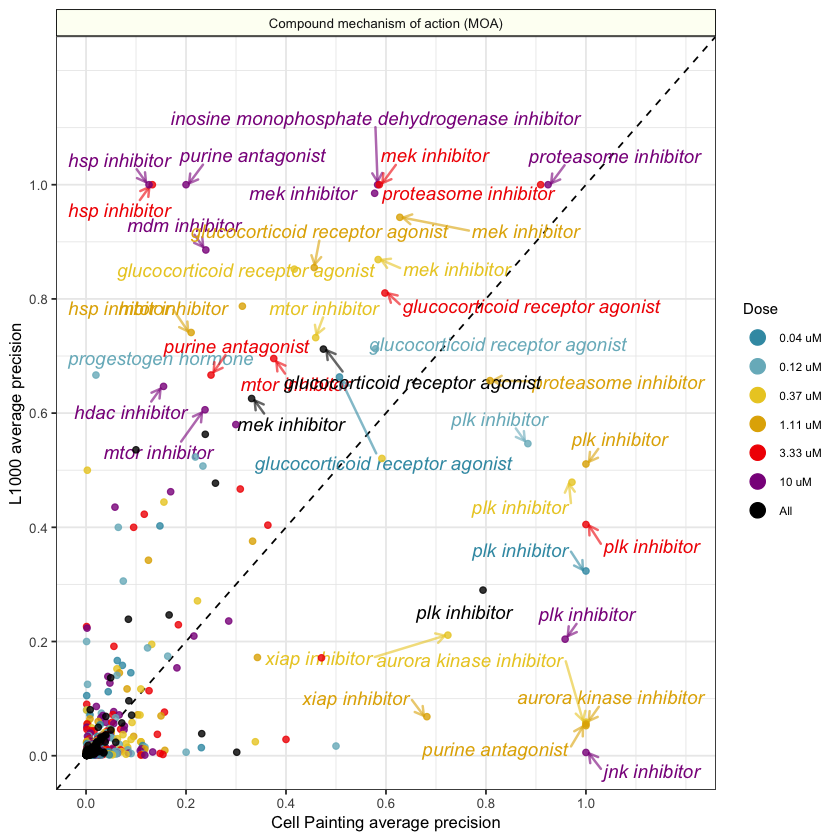

In [24]:
panel_d_df <- precision_df %>%
    dplyr::filter(impact_category == "Compound mechanism of action (MOA)")

color_logic <- (
    panel_d_df$L1000 > 0.60 |
    panel_d_df$cell_painting > 0.6
    )

panel_d_gg <- (
    ggplot(panel_d_df, aes(x = cell_painting, y = L1000, color = dose))
    + facet_grid("~impact_category")
    + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black")
    + figure_theme
    + xlab("Cell Painting average precision")
    + ylab("L1000 average precision")
    + geom_text_repel(
        data = subset(panel_d_df, color_logic),
        arrow = arrow(length = unit(0.015, "npc")),
        segment.size = 0.7,
        segment.alpha = 0.6,
        size = 4,
        fontface = "italic",
        box.padding = 0.5,
        point.padding = 0.25,
        aes(
            x = cell_painting,
            y = L1000,
            label = drug_impact,
        )
    )
    + geom_point(alpha = 0.8)
    + scale_color_manual(name = "Dose", values = dose_colors)
    + scale_x_continuous(breaks = seq(0, 1, 0.2), limits = c(0, 1.2))
    + scale_y_continuous(breaks = seq(0, 1, 0.2), limits = c(0, 1.2))
    + guides(
        color = guide_legend(override.aes = list(size = 4, alpha = 1)),
        text = guide_legend(override.aes = list(alpha = 0))
    )
)

panel_d_gg

## Panel E - Target

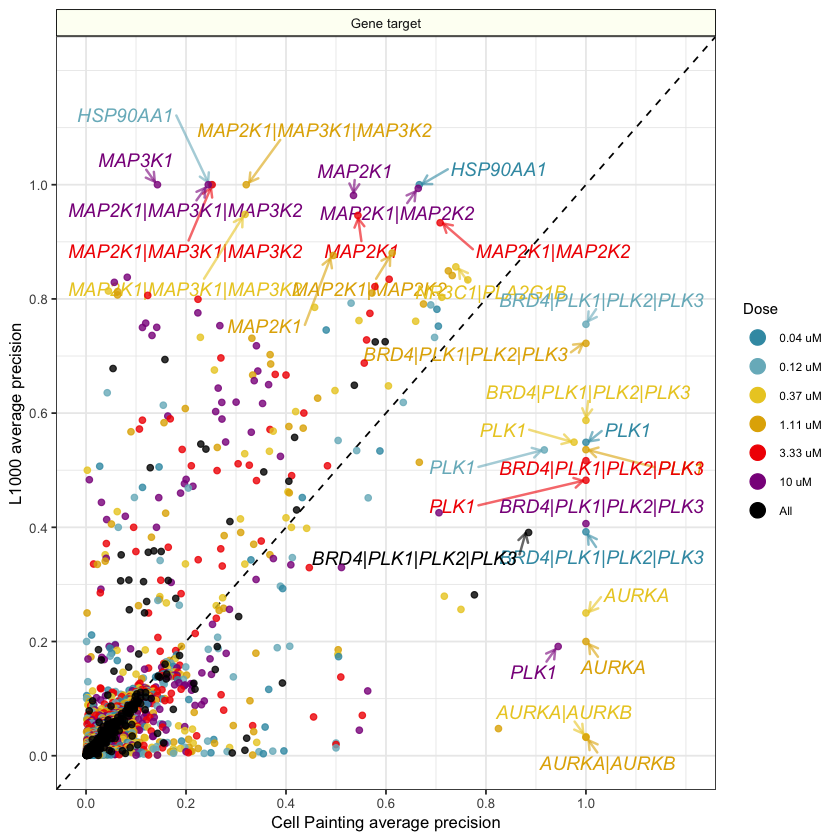

In [25]:
panel_e_df <- precision_df %>% dplyr::filter(impact_category == "Gene target")

color_logic <- (
    panel_e_df$L1000 > 0.85 |
    panel_e_df$cell_painting > 0.85
    )

panel_e_gg <- (
    ggplot(panel_e_df, aes(x = cell_painting, y = L1000, color = dose))
    + facet_grid("~impact_category")
    + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black")
    + figure_theme
    + xlab("Cell Painting average precision")
    + ylab("L1000 average precision")
    + geom_text_repel(
        data = subset(panel_e_df, color_logic),
        arrow = arrow(length = unit(0.015, "npc")),
        segment.size = 0.7,
        segment.alpha = 0.6,
        size = 4,
        fontface = "italic",
        box.padding = 0.5,
        point.padding = 0.25,
        aes(
            x = cell_painting,
            y = L1000,
            label = drug_impact,
        )
    )
    + geom_point(alpha = 0.8)
    + scale_color_manual(name = "Dose", values = dose_colors)
    + scale_x_continuous(breaks = seq(0, 1, 0.2), limits = c(0, 1.2))
    + scale_y_continuous(breaks = seq(0, 1, 0.2), limits = c(0, 1.2))
    + guides(
        color = guide_legend(override.aes = list(size = 4, alpha = 1)),
        text = guide_legend(override.aes = list(alpha = 0))
    )
)

panel_e_gg

## Compile figure 2

Warning message:
“Removed 7 rows containing missing values (geom_text).”
Warning message:
“Removed 7 rows containing missing values (geom_text).”
Warning message:
“Removed 7 rows containing missing values (geom_text).”


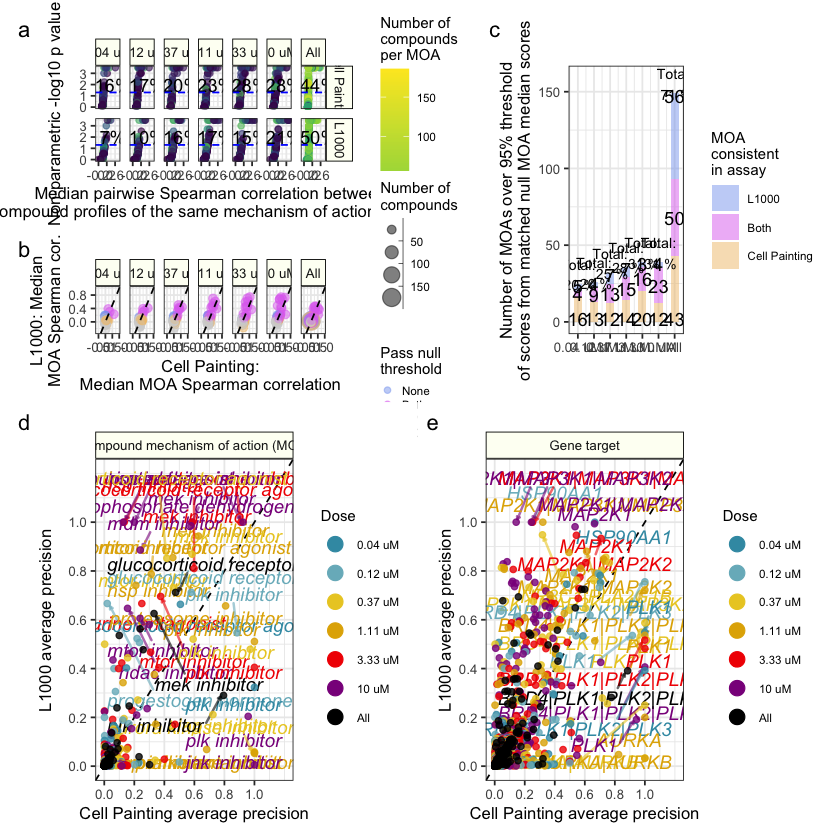

In [26]:
left_panel <- (panel_a_gg / panel_b_gg) + plot_layout(heights = c(2, 1))
top_panel <- (left_panel | panel_c_gg) + plot_layout(widths = c(2, 1))

bottom_panel <- (panel_d_gg | panel_e_gg)

figure_2_gg <- (
    top_panel / bottom_panel
    + plot_layout(heights = c(2, 2.4))
    + plot_annotation(tag_levels = "a")
)

for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    ggplot2::ggsave(output_file, figure_2_gg, width = 17, height = 14, dpi = 500)
}

figure_2_gg